## Template Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img_path = "../resource/img/Lenna.png"
template_path = "../resource/img/template2.png"
print(os.path.exists(img_path))
print(os.path.exists(template_path))

True
True


In [2]:
img = cv2.imread(img_path, 0)
img2 = img.copy()
template = cv2.imread(template_path, 0)
w, h = template.shape[::-1]

In [3]:
methods = [
    "cv2.TM_CCOEFF",
    "cv2.TM_CCOEFF_NORMED",
    "cv2.TM_CCORR",
    "cv2.TM_CCORR_NORMED",
    "cv2.TM_SQDIFF",
    "cv2.TM_SQDIFF_NORMED"
]

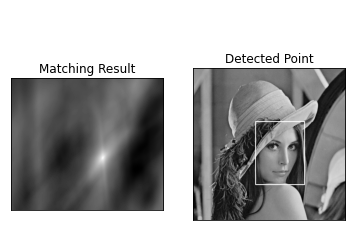

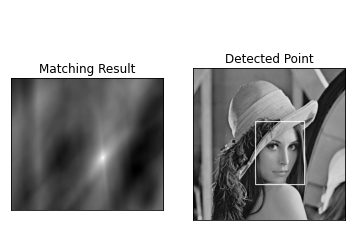

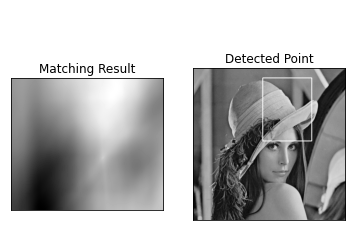

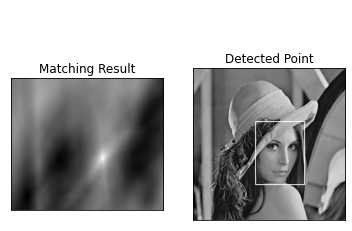

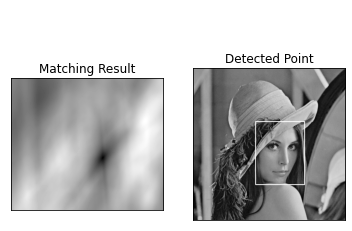

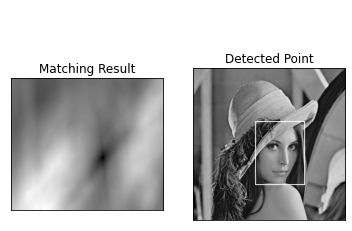

In [4]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    
    plt.subplot(121)
    plt.imshow(res, cmap="gray")
    plt.title("Matching Result")
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(img, cmap="gray")
    plt.title("Detected Point")
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(meth, color="white")
    plt.show()